#### Graph Connectivity and Traversal

Implementations of BFS, DFS and an algorithm for finding all connected components in a graph. We will use the adjacency list representation only.

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(adjacency_list, fig_size=5):
    # Create a new graph
    G = nx.Graph()

    # Add edges to the graph
    for node, neighbours in enumerate(adjacency_list):
        for neighbour in neighbours:
            G.add_edge(node, neighbour)

    # Draw the graph
    plt.figure(figsize=(fig_size, fig_size))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()


In [22]:
class tree_node:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child):
        self.children.append(child)

    def __str__(self):
        return str(self.value)

# bredth-first search, layer version
def BFS(adjacency_list, s, return_tree=False):
    assert s < len(adjacency_list), "s is out of range"
    # initialize all vertices as undiscovered except for s
    discovered = [False] * len(adjacency_list)
    discovered[s] = True
    # intiialize first layer
    i = 0
    layers = []
    layers.append([s])
    # initialize BFS tree (we will represent the tree as a list of edges)
    T = []
    # run BFS
    while len(layers[i])>0:
        # initialize next layer
        layers.append([])
        # find vertices adjacent to the vertices in current layer and add them to the next layer if they are undiscovered
        for u in layers[i]:
            for v in adjacency_list[u]:
                if not discovered[v]:
                    discovered[v] = True
                    # add to next layer
                    layers[i+1].append(v)
                    # add edge to BFS tree
                    T.append((u,v))
        # increment layer counter
        i += 1                

    if return_tree:
        return discovered, layers, T
    else:
        return discovered, layers


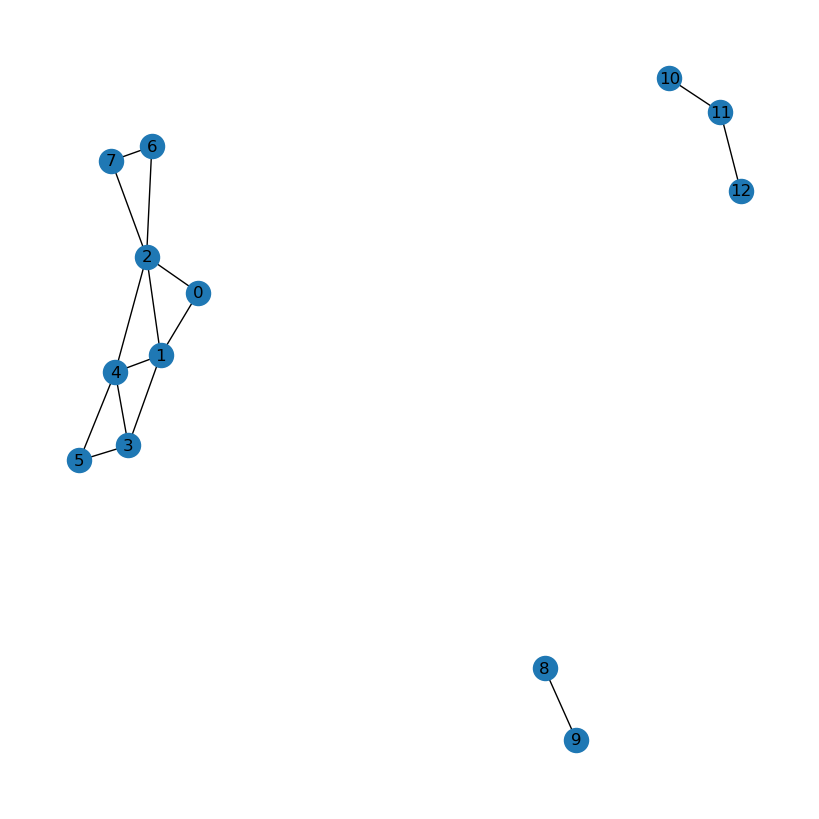

Nodes discovered from 0: [0, 1, 2, 3, 4, 5, 6, 7]
Layers: [[0], [1, 2], [3, 4, 6, 7], [5], []]


In [23]:
# example undirected graph
adjacency_list = [[1,2], [0,2,3,4], [0,1,4,6,7], [1,4,5], [1,3,5], [4], [2,7], [2,6], [9], [8], [11], [10,12], [11]]

plot_graph(adjacency_list, fig_size=8)

# run BFS
s = 0
discovered, layers, T = BFS(adjacency_list, s, return_tree=True)
print(f"Nodes discovered from {s}: {[i for i, d in enumerate(discovered) if d]}") 
print(f"Layers: {layers}")